In [1]:
#import libs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
catalog.list()

['election_databse',
 'pp_election_time_correction',
 'pp_election',
 'encode_territoryname_dataset',
 'encode_party_dataset',
 'election_normalized_dataset',
 'election_without_outliers_dataset',
 'model_results',
 'label_encoder',
 'label_encoder_party',
 'parameters']

In [3]:
df = catalog.load('election_databse')
pd.set_option('display.max_columns', None)
df.head()

2022-06-29 21:57:56,157 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
df.dtypes
#territoryName ----- object
#Party ----- object

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [191]:
print(df['territoryName'].value_counts().mean())
print(df['Party'].value_counts().mean())




1030.6190476190477
1030.6190476190477


2022-06-30 02:34:43,237 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


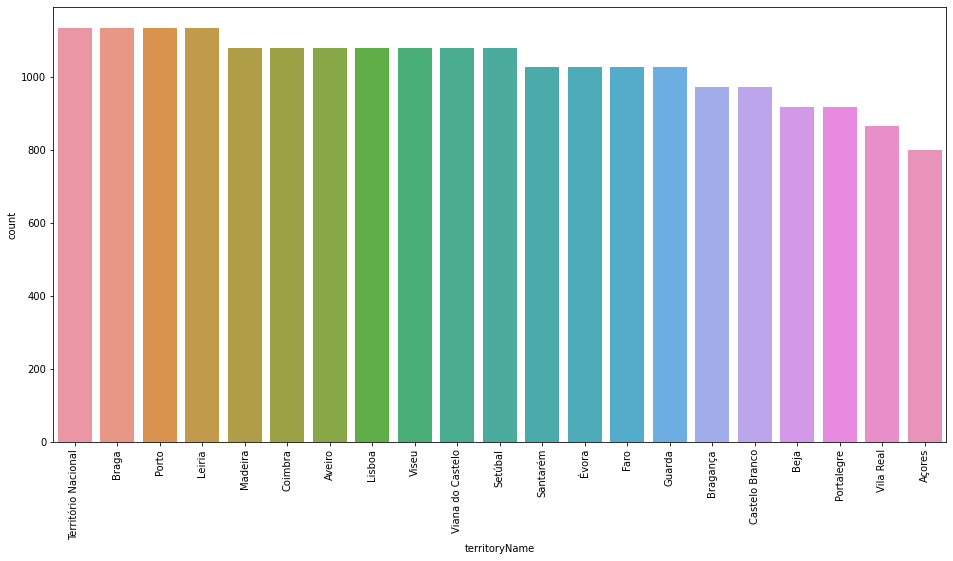

In [187]:
#Avaliando o Nome de territorio
f, ax = plt.subplots(figsize=(16,8))
territory_plot = sns.countplot(x='territoryName', data=catalog.load('election_databse'), order = df['territoryName'].value_counts().index)
territory_plot.set_xticklabels(territory_plot.get_xticklabels(), rotation=90)
fig = territory_plot.get_figure()
fig.savefig("fig_territory.png") 

2022-06-29 23:35:32,395 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


<AxesSubplot:xlabel='Party', ylabel='count'>

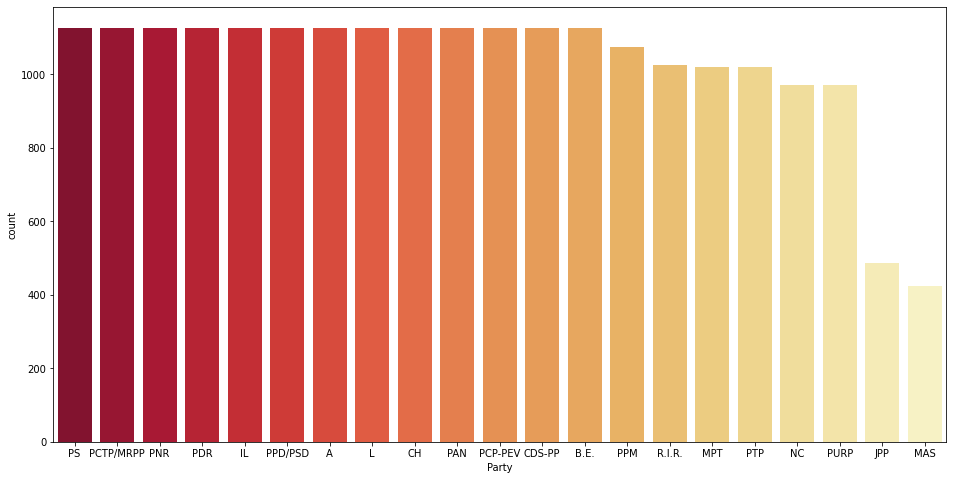

In [163]:
#Avaliando o partido
f, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Party', data=catalog.load('election_databse'), order = df['Party'].value_counts().index, palette = "YlOrRd_r")
#fig = party_plot.get_figure()
#fig.savefig("fig_party.png") YlOrRd_r // gist_heat // plasma

2022-06-29 23:41:22,205 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


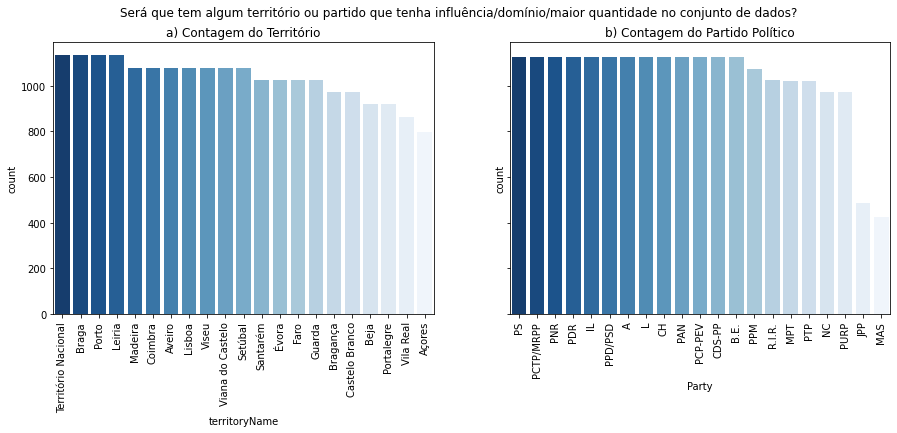

In [173]:
# Qual o territorio e o partido que tem mais frequencia nos dados? 
# Será que tem algum territorio ou partido que tenha dominancia no conjunto de dados? 

df = catalog.load('election_databse')

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Será que tem algum território ou partido que tenha influência/domínio/maior quantidade no conjunto de dados?')

axes[0].set_title('a) Contagem do Território')
territory = sns.countplot(df['territoryName'], data=df, ax=axes[0], order = df['territoryName'].value_counts().index, palette = "Blues_r")
axes[0].set_xticklabels(territory.get_xticklabels(), rotation=90)

axes[1].set_title('b) Contagem do Partido Político')
party = sns.countplot(df['Party'],data=df, ax=axes[1], order = df['Party'].value_counts().index, palette = "Blues_r")
axes[1].set_xticklabels(party.get_xticklabels(), rotation=90)

plt.show()



In [73]:
dados_election = catalog.load('election_databse')

2022-06-29 23:00:39,084 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


In [8]:
corr = dados_election[['totalMandates', 'availableMandates']].corr()
corr

,totalMandates,availableMandates
totalMandates,1.000000,0.217404
availableMandates,0.217404,1.000000


<AxesSubplot:>

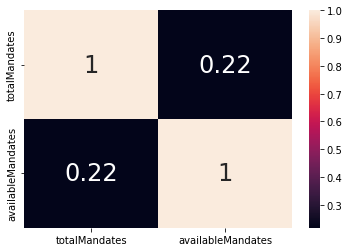

In [194]:
f, ax = plt.subplots()
sns.heatmap(data=corr, 
           annot=True,
           annot_kws={'size':24})

In [10]:
corr_all = catalog.load('election_databse').corr()
corr_all
corr_all.style.background_gradient(cmap='Reds')

2022-06-29 21:57:56,967 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,0.195487,0.198243,0.195734,0.093739,0.189902,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,0.974407,0.976336,0.973357,0.034774,0.969992,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,0.385828,0.379093,0.383877,-0.008966,0.399074,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,0.856855,0.850881,0.856779,0.036461,0.864837,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,0.946191,0.940941,0.947190,0.050378,0.951899,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,0.998297,0.997951,0.999657,0.072183,0.997490,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,0.001598,-0.002062,0.030061,0.959142,-0.006067,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,0.998988,0.998405,0.998883,0.041317,0.999298,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,-0.157263,-0.161816,-0.152234,0.100924,-0.141809,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,0.173603,0.190476,0.181595,-0.144312,0.170285,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


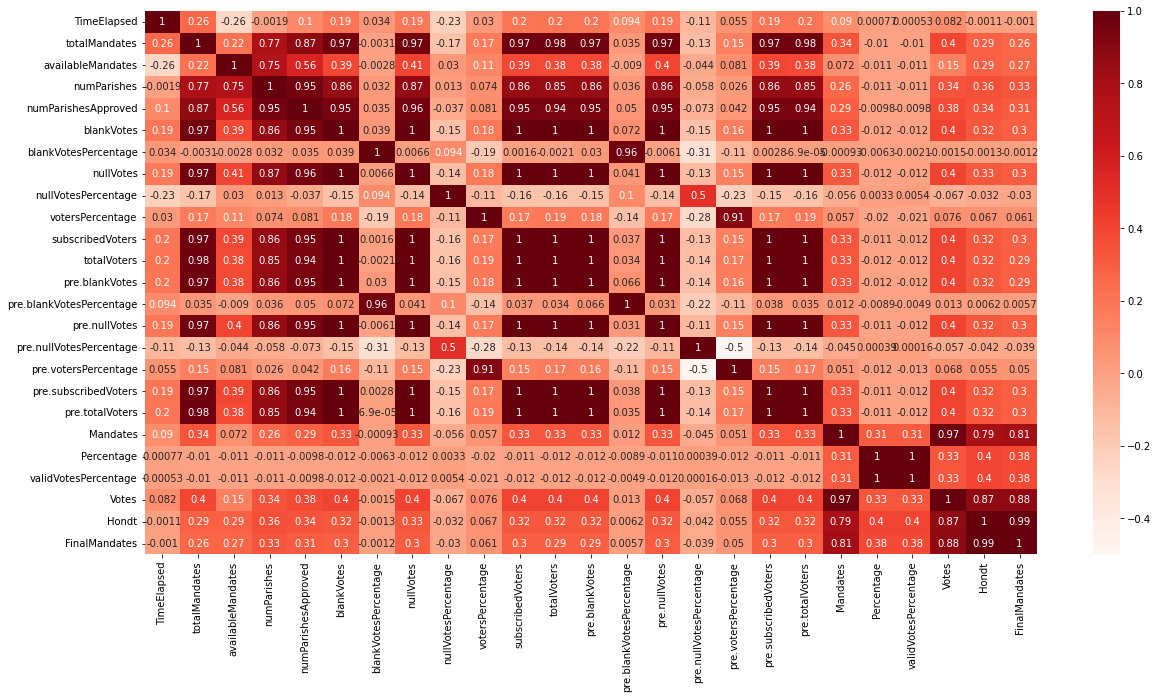

In [11]:
f, ax = plt.subplots(figsize=(20,10))
corr_analysis = sns.heatmap(data=corr_all, 
           annot=True,
           annot_kws=None,
           cmap="Reds")
plt.show()
fig = corr_analysis.get_figure()
fig.savefig("fig_corr_analysis.png") 

2022-06-29 22:53:05,619 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


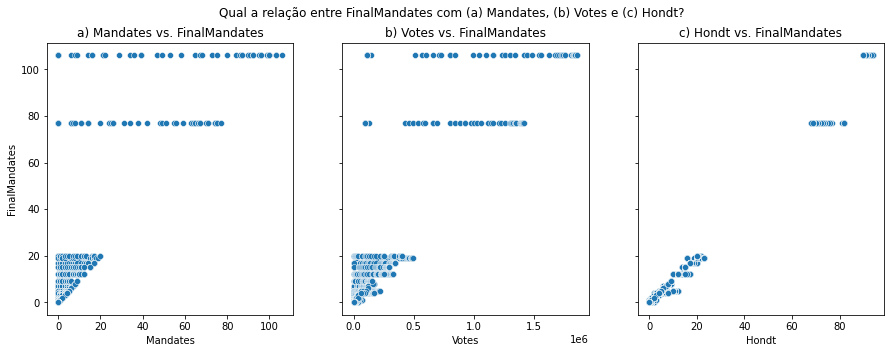

In [49]:
#É observado na no heatmap que o FinalMandates tem alta correlacao com (a) Mandates, (b) Votes e (c) Hondt. 
# Qual a relação entre Mandates com o FinalMandates?
#define dimensions of subplots (rows, columns)

df = catalog.load('election_databse')

fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
FinalMandates = fig.suptitle('Qual a relação entre FinalMandates com (a) Mandates, (b) Votes e (c) Hondt?')
axes[0].set_title('a) Mandates vs. FinalMandates')
sns.scatterplot(ax=axes[0], x=df['Mandates'], y=df['FinalMandates'])

axes[1].set_title('b) Votes vs. FinalMandates')
sns.scatterplot(ax=axes[1], x=df['Votes'], y=df['FinalMandates'])

axes[2].set_title('c) Hondt vs. FinalMandates')
sns.scatterplot(ax=axes[2], x=df['Hondt'], y=df['FinalMandates'])
plt.show()

fig = FinalMandates.get_figure()
fig.savefig("fig_finalmandates.png") 

In [12]:
#Limpando o dataframe, considerando a correlacao >0,9
dados_election = catalog.load('election_databse')
dados_election_corr = df.drop(columns=['TimeElapsed', 'availableMandates', 'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage', 'pre.blankVotesPercentage', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'Percentage', 'validVotesPercentage'])
dados_election_corr.shape
dados_election_corr.dtypes


2022-06-29 21:57:58,671 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


time                    object
territoryName           object
totalMandates            int64
numParishes              int64
numParishesApproved      int64
blankVotes               int64
nullVotes                int64
subscribedVoters         int64
totalVoters              int64
pre.blankVotes           int64
pre.nullVotes            int64
pre.subscribedVoters     int64
pre.totalVoters          int64
Party                   object
Mandates                 int64
Votes                    int64
Hondt                    int64
FinalMandates            int64
dtype: object

In [175]:
def func_drop_columns(df):
    """ This function clears the dataframe. Study performed from the heatmap, considering correlation > 0.9 """    
   
    #Remove columns with correlation less than 0.9
    df = df.drop(columns=['TimeElapsed', 'availableMandates', 'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage', 'pre.blankVotesPercentage', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'Percentage', 'validVotesPercentage'])
    
    return df


In [ ]:
#testando a funcao

df_cleaned = func_drop_columns(catalog.load('election_databse'))

2022-06-29 22:43:57,497 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


<AxesSubplot:>

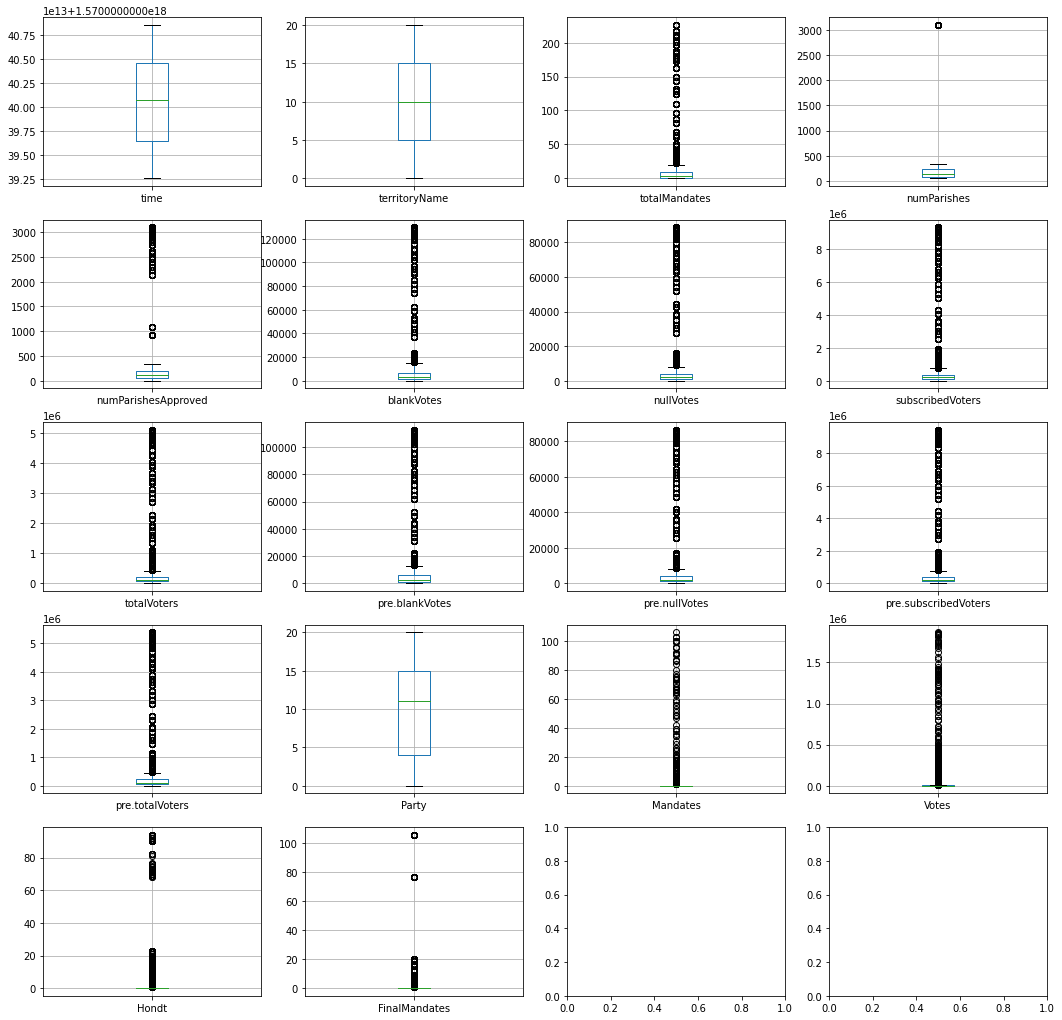

In [46]:
#Verificando outliers:
dados_election_encoded = catalog.load('encode_party_dataset')
dados_election_encoded


#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(5, 4, figsize=(18,18))

dados_election_encoded.boxplot(column=['time'], ax=axes[0,0])
dados_election_encoded.boxplot(column=['territoryName'], ax=axes[0,1])
dados_election_encoded.boxplot(column=['totalMandates'], ax=axes[0,2])
dados_election_encoded.boxplot(column=['numParishes'], ax=axes[0,3])
dados_election_encoded.boxplot(column=['numParishesApproved'], ax=axes[1,0])
dados_election_encoded.boxplot(column=['blankVotes'], ax=axes[1,1])
dados_election_encoded.boxplot(column=['nullVotes'], ax=axes[1,2])
dados_election_encoded.boxplot(column=['subscribedVoters'], ax=axes[1,3])
dados_election_encoded.boxplot(column=['totalVoters'], ax=axes[2,0])
dados_election_encoded.boxplot(column=['pre.blankVotes'], ax=axes[2,1])
dados_election_encoded.boxplot(column=['pre.nullVotes'], ax=axes[2,2])
dados_election_encoded.boxplot(column=['pre.subscribedVoters'], ax=axes[2,3])
dados_election_encoded.boxplot(column=['pre.totalVoters'], ax=axes[3,0])
dados_election_encoded.boxplot(column=['Party'], ax=axes[3,1])
dados_election_encoded.boxplot(column=['Mandates'], ax=axes[3,2])
dados_election_encoded.boxplot(column=['Votes'], ax=axes[3,3])
dados_election_encoded.boxplot(column=['Hondt'], ax=axes[4,0])
dados_election_encoded.boxplot(column=['FinalMandates'], ax=axes[4,1])